In [201]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import nltk
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [202]:
train_df = pd.read_csv("/content/sample_data/train_tweets.csv")
test_df = pd.read_csv("/content/sample_data/test_tweets.csv")

In [203]:
combine_df = train_df._append(test_df, ignore_index= False, sort= False)
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49159 entries, 0 to 17196
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49159 non-null  int64  
 1   label   31962 non-null  float64
 2   tweet   49159 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ MB


# Data cleaning

In [204]:
import html

In [205]:
#removing html links from the csv file
combine_df['clean_tweet']=combine_df['tweet'].apply(lambda x: html.unescape(x))
combine_df.head(5)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [206]:
def remove_pattern(input_text, pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i,' ', input_text)
    return input_text

In [207]:
#removing the word that comes after @
combine_df['clean_tweet']=np.vectorize(remove_pattern)(combine_df['clean_tweet'], '@[\w]*')
combine_df.head(3)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0.0,bihday your majesty,bihday your majesty


In [208]:
# shifting all the tweets to lower case
combine_df['clean_tweet']= combine_df['clean_tweet'].apply(lambda x: x.lower())
combine_df.head(3)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0.0,bihday your majesty,bihday your majesty


In [209]:
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [210]:
def up_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [211]:
#removing the apstrophe from the words
combine_df['clean_tweet']= combine_df['clean_tweet'].apply(lambda x: up_dict(x, apostrophe_dict))
combine_df.head(3)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0.0,bihday your majesty,bihday your majesty


In [212]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [213]:
#removing the shortforms from the tweets
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: up_dict(x,short_word_dict))
combine_df.head(3)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0.0,bihday your majesty,bihday your majesty


In [214]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [215]:
#removing the emoticons from the tweets
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: up_dict(x,emoticon_dict))
combine_df.head(3)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0.0,bihday your majesty,bihday your majesty


In [216]:
#removing the punctuations from the tweet
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
combine_df.head(3)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause ...
2,3,0.0,bihday your majesty,bihday your majesty


In [217]:
#removing the special characters from the tweets
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x:re.sub(r'[^a-zA-Z0-9]',' ', x))
combine_df.head(3)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause ...
2,3,0.0,bihday your majesty,bihday your majesty


In [218]:
#removing the numbers from the tweets
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
combine_df.head(3)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause ...
2,3,0.0,bihday your majesty,bihday your majesty


In [219]:
#removing the single lettered words
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
combine_df['clean_tweet'].head(3)

0    when father is dysfunctional and is so selfish...
1    thanks for lyft credit can use cause they don ...
2                                  bihday your majesty
Name: clean_tweet, dtype: object

In [220]:
pip install TextBlob

In [221]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [222]:
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [223]:
#tokenizing the tweets
combine_df['tweet_token'] = combine_df['clean_tweet'].apply(lambda x: word_tokenize(x))
combine_df.head(3)

,id,label,tweet,clean_tweet,tweet_token
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit can use cause they don ...,"[thanks, for, lyft, credit, can, use, cause, t..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"


In [224]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [225]:
#removing the stop words from the tweet
combine_df['tweet_token_filtered'] = combine_df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])
combine_df[['tweet_token', 'tweet_token_filtered']].head(5)

,tweet_token,tweet_token_filtered
0,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ..."
1,"[thanks, for, lyft, credit, can, use, cause, t...","[thanks, lyft, credit, use, cause, offer, whee..."
2,"[bihday, your, majesty]","[bihday, majesty]"
3,"[model, love, take, with, all, the, time, in, ur]","[model, love, take, time, ur]"
4,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"


In [226]:
#stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [227]:
#creating a column for tokens that are stemmed
combine_df['tweet_stemmed'] = combine_df['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
combine_df['tweet_stemmed'].head(10)

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit use caus offer wheelchair va...
2                                       bihday majesti
3                              model love take time ur
4                              factsguid societi motiv
5    huge fan fare big talk leav chao pay disput ge...
6                                  camp tomorrow danni
7    next school year year exam think school exam h...
8    love land allin cav champion cleveland clevela...
9                                            welcom gr
Name: tweet_stemmed, dtype: object

In [228]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [229]:
#lemmatizing
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [230]:
lemmatizing = WordNetLemmatizer()

In [231]:
combine_df['tweet_lemmatized'] = combine_df['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
combine_df['tweet_lemmatized'].head(10)

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit use cause offer wheelchair ...
2                                       bihday majesty
3                              model love take time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
6                               camping tomorrow danny
7    next school year year exam think school exam h...
8    love land allin cavs champion cleveland clevel...
9                                           welcome gr
Name: tweet_lemmatized, dtype: object

In [232]:
combine_df.head(5)

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...",father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit can use cause they don ...,"[thanks, for, lyft, credit, can, use, cause, t...","[thanks, lyft, credit, use, cause, offer, whee...",thank lyft credit use caus offer wheelchair va...,thanks lyft credit use cause offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]",bihday majesti,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,model love take with all the time in ur,"[model, love, take, with, all, the, time, in, ur]","[model, love, take, time, ur]",model love take time ur,model love take time ur
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation


# Text Analysis

In [233]:
import matplotlib.pyplot as plt


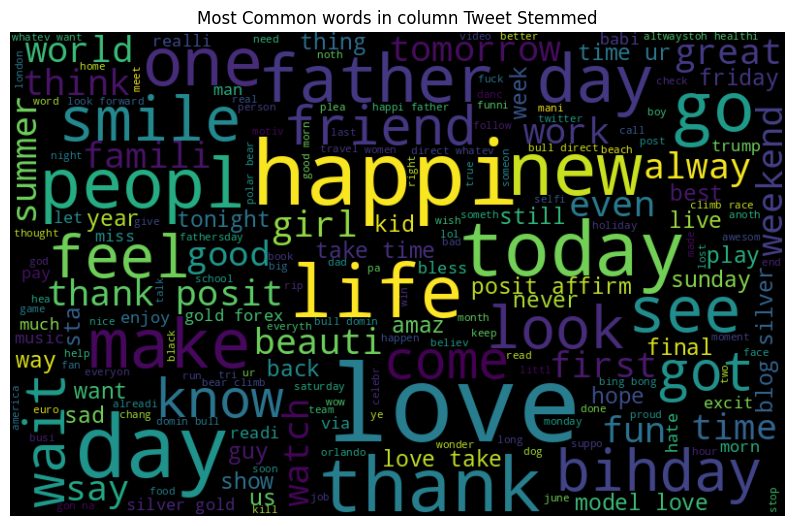

In [234]:
#wordcloud for most common words used in 'tweet_stemmed'
all_words = ' '.join([text for text in combine_df['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

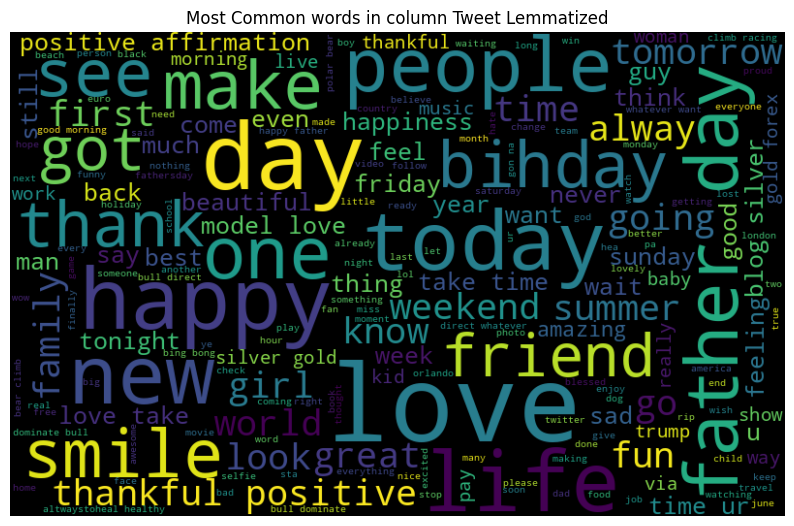

In [235]:
#wordcloud for most common words used in 'tweet_lemmatized'
all_words = ' '.join([text for text in combine_df['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

# Feature Extraction from the stemmed and lemmatized tweets (TF-IDF)

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [237]:
tfidf_stem = tfidf_vectorizer.fit_transform(combine_df['tweet_stemmed'])
tfidf_stem

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 203168 stored elements in Compressed Sparse Row format>

In [238]:
tfidf_lemm = tfidf_vectorizer.fit_transform(combine_df['tweet_lemmatized'])
tfidf_lemm

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 187064 stored elements in Compressed Sparse Row format>

# Logistic Regression model for stemmed and lemmatized tweets

In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
lreg = LogisticRegression()

In [240]:
def model_Evaluate(model):
  y_pred = model.predict(xvalid_tfidf)
  print(classification_report(yvalid, y_pred))
  cf_matrix = confusion_matrix(yvalid, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Model Evaluation for stemmed tweets

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8905
           1       0.78      0.37      0.50       684

    accuracy                           0.95      9589
   macro avg       0.86      0.68      0.74      9589
weighted avg       0.94      0.95      0.94      9589



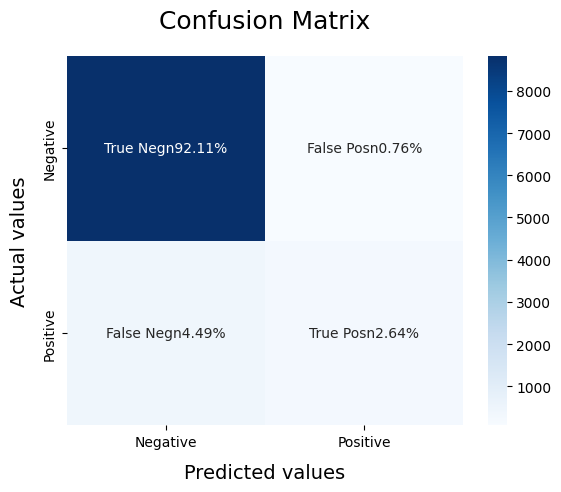

In [241]:
train_tfidf = tfidf_stem[:31962,:]
test_tfidf = tfidf_stem[31962:,:]

xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train_df['label'], random_state=42, test_size=0.3)

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(xtrain_tfidf, ytrain)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(xvalid_tfidf)

## Model Evaluation for lemmatized tweets

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8905
           1       0.79      0.36      0.49       684

    accuracy                           0.95      9589
   macro avg       0.87      0.67      0.73      9589
weighted avg       0.94      0.95      0.94      9589



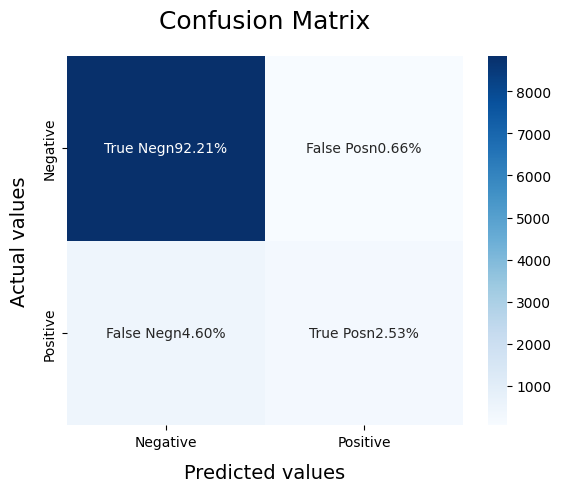

In [242]:
train_tfidf = tfidf_lemm[:31962,:]
test_tfidf = tfidf_lemm[31962:,:]

xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train_df['label'], random_state=42, test_size=0.3)

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(xtrain_tfidf, ytrain)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(xvalid_tfidf)